In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
import re

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_31816\805383306.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
df = pd.read_csv("data_cleaned.csv")

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_11376\2018071297.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


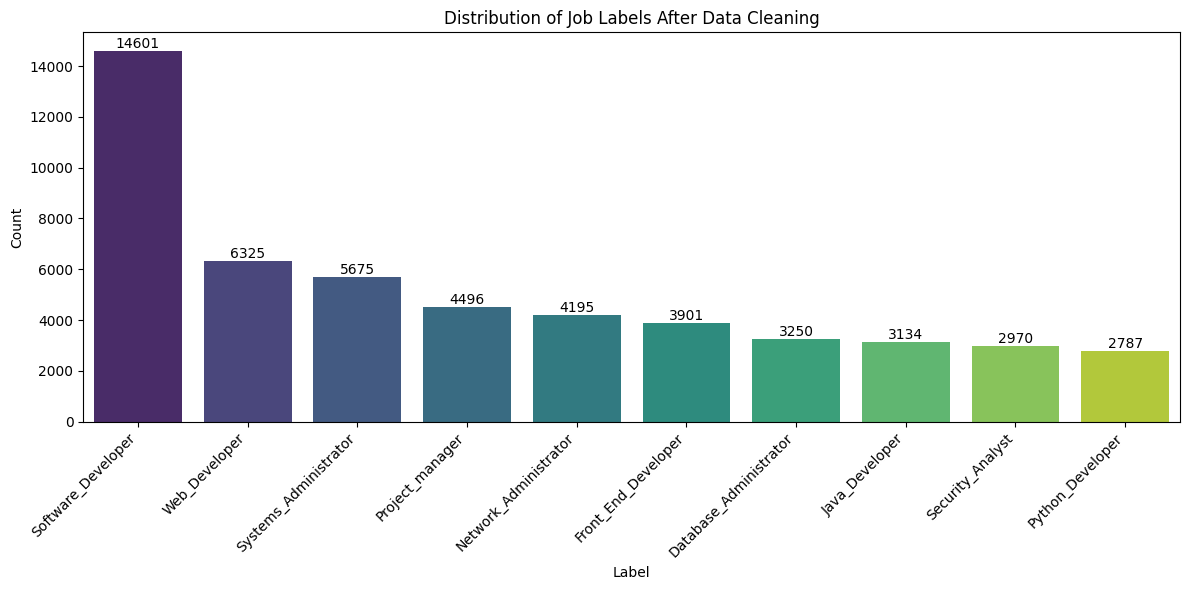


Exact counts:
Software_Developer: 14601
Web_Developer: 6325
Systems_Administrator: 5675
Project_manager: 4496
Network_Administrator: 4195
Front_End_Developer: 3901
Database_Administrator: 3250
Java_Developer: 3134
Security_Analyst: 2970
Python_Developer: 2787


In [12]:
# Extract individual labels from all combined labels
all_individual_labels = []
for labels in df['label'].dropna():
    all_individual_labels.extend(labels.split(';'))

individual_label_counts = pd.Series(all_individual_labels).value_counts()

top_10_individual = individual_label_counts.head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_10_individual.index,
    y=top_10_individual.values,
    palette='viridis'
)

for i, v in enumerate(top_10_individual.values):
    ax.text(
        i, v, str(int(v)),
        ha='center', va='bottom',
        fontsize=10
    )

plt.title('Distribution of Job Labels After Data Cleaning')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\nExact counts:")
for label, count in top_10_individual.items():
    print(f"{label}: {int(count)}")

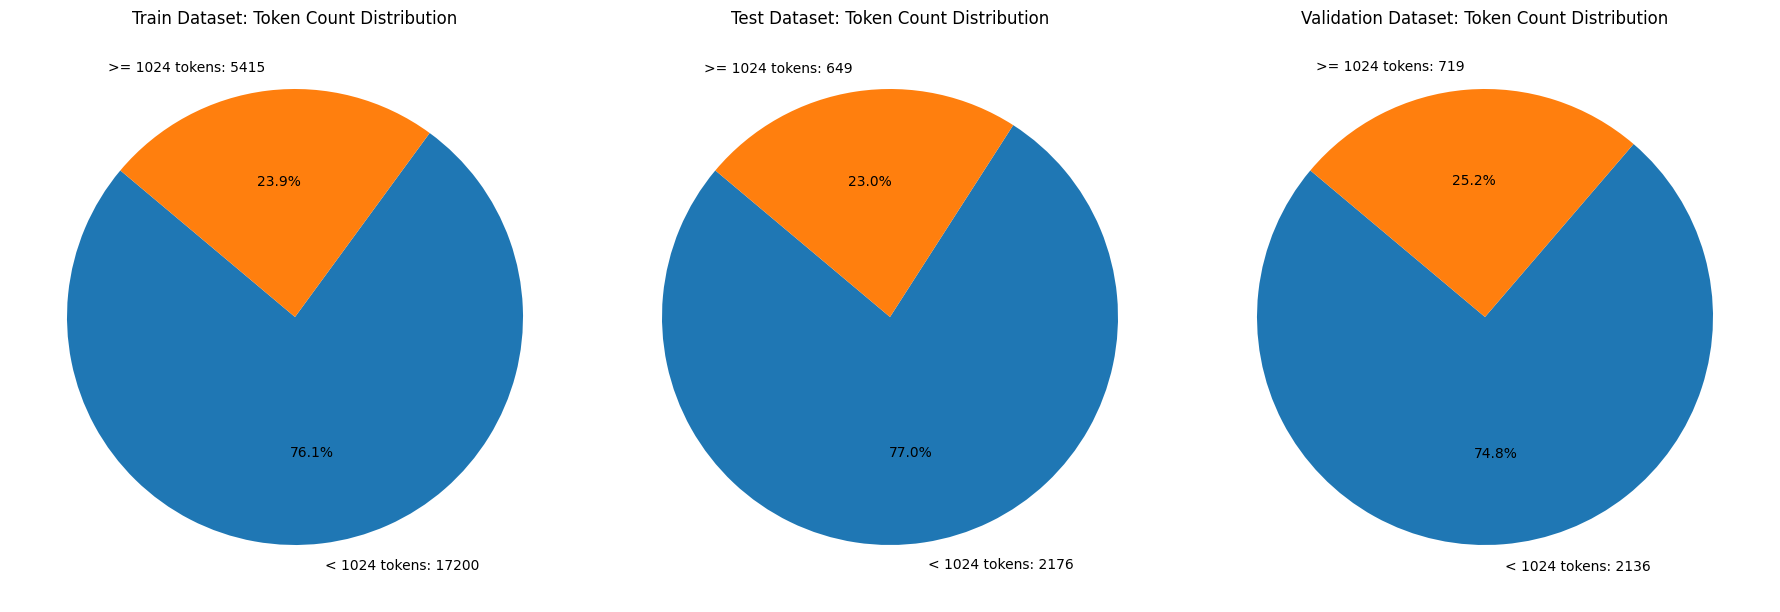

In [4]:
# Load the datasets from the CSV files
train_file_path = r'C:\Users\LAPTOP\Desktop\Multi-label-resume-classification\Preprocessing\data\train.csv'
test_file_path = r'C:\Users\LAPTOP\Desktop\Multi-label-resume-classification\Preprocessing\data\test.csv'
val_file_path = r'C:\Users\LAPTOP\Desktop\Multi-label-resume-classification\Preprocessing\data\val.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
val_df = pd.read_csv(val_file_path)

# Define a simple tokenizer function using regex
def simple_tokenizer(text):
    # Extract tokens as words or numbers, removing punctuation
    tokens = re.findall(r'\b\w+\b', str(text))
    return tokens

# Calculate the number of tokens for each row in the 'text' column for each dataset
train_df['token_count'] = train_df['text'].apply(lambda x: len(simple_tokenizer(x)))
test_df['token_count'] = test_df['text'].apply(lambda x: len(simple_tokenizer(x)))
val_df['token_count'] = val_df['text'].apply(lambda x: len(simple_tokenizer(x)))

# Calculate the number of rows based on the token count threshold
threshold = 1024

def get_token_count_distribution(df):
    less_than_threshold = df[df['token_count'] < threshold].shape[0]
    greater_than_threshold = df[df['token_count'] >= threshold].shape[0]
    return less_than_threshold, greater_than_threshold

train_dist = get_token_count_distribution(train_df)
test_dist = get_token_count_distribution(test_df)
val_dist = get_token_count_distribution(val_df)

# Prepare data and plot pie charts for each dataset
labels = [f'< {threshold} tokens', f'>= {threshold} tokens']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for train dataset
axes[0].pie(
    train_dist,
    labels=[f'{label}: {size}' for label, size in zip(labels, train_dist)],
    autopct='%1.1f%%',
    startangle=140
)
axes[0].set_title(f'Train Dataset: Token Count Distribution')

# Plot for test dataset
axes[1].pie(
    test_dist,
    labels=[f'{label}: {size}' for label, size in zip(labels, test_dist)],
    autopct='%1.1f%%',
    startangle=140
)
axes[1].set_title(f'Test Dataset: Token Count Distribution')

# Plot for validation dataset
axes[2].pie(
    val_dist,
    labels=[f'{label}: {size}' for label, size in zip(labels, val_dist)],
    autopct='%1.1f%%',
    startangle=140
)
axes[2].set_title(f'Validation Dataset: Token Count Distribution')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()